<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP2/TP2_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')   #lo uso para cmabiar el background de las figuras porque uso dark mode
%matplotlib inline

In [ ]:
#Creo el data set A

# Semilla aletoria
np.random.seed(1)
pd.set_option('display.max_rows', 15)

df_A = pd.DataFrame(np.random.normal(scale=10.0, size=(50, 1)),
                        columns=['Size'])
df_A['Tag'] = 'A'

df_A

,Size,Tag
0,16.243454,A
1,-6.117564,A
2,-5.281718,A
3,-10.729686,A
4,8.654076,A
...,...,...
45,-6.369956,A
46,1.909155,A
47,21.002551,A
48,1.201590,A


In [ ]:
#Creo el data set B

# Semilla aletoria
np.random.seed(354748)
pd.set_option('display.max_rows', 15)

df_B = pd.DataFrame(np.random.normal(loc = 30, scale=8.0, size=(50, 1)),
                        columns=['Size'])
df_B['Tag'] = 'B'

df_B

,Size,Tag
0,27.879259,B
1,34.463032,B
2,33.671931,B
3,33.531482,B
4,33.424538,B
...,...,...
45,20.249529,B
46,18.369346,B
47,43.959442,B
48,36.179852,B


In [ ]:
df = pd.concat([df_A, df_B], ignore_index=True)
df = df.sort_values(by = ['Size'], ignore_index=True)
df

,Size,Tag
0,-23.015387,A
1,-20.601407,A
2,-11.173103,A
3,-11.006192,A
4,-10.998913,A
...,...,...
95,41.525776,B
96,41.838345,B
97,42.586062,B
98,43.959442,B


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


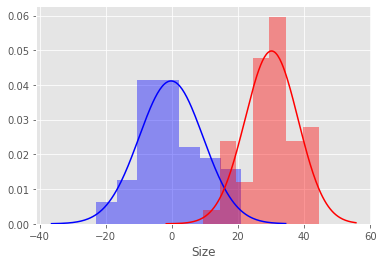

In [ ]:
from scipy.stats import norm
style.use('ggplot') or plt.style.use('ggplot')   #lo uso para cmabiar el background de las figuras porque uso dark mode


ax1 = sns.distplot(df_A['Size'], fit=norm, kde=False, color = 'b', fit_kws={"color":"blue"});
sns.distplot(df_B['Size'], fit=norm, kde=False, color = 'r', ax = ax1, fit_kws={"color":"red"});

Creo la curva ROC siguiendo el mecanismo visto en clase:

*Si encuentro un True me muevo hacia arriba \\
*Si encuentro un False me muevo hacia la derecha

In [ ]:
from math import sqrt

def CurvaRoc(dummy_df1,dummy_df2):
  dummy_df = pd.concat([dummy_df1, dummy_df1], ignore_index=True)
  x, y = [0]*(dummy_df.index[-1]+1), [0]*(dummy_df.index[-1]+1)
  for i in range(dummy_df.index[-1]+1):
    if i == 0:
      if dummy_df['Tag'][i] == 'A':
        y[i] = 1/dummy_df1.index[-1]
        x[i] = 0
  
      else:
        y[i] = 0
        x[i] = 1/dummy_df2.index[-1]
    
    else:
      if df['Tag'][i] == "A":
        y[i] = y[i-1] + 1/dummy_df1.index[-1]
        x[i] = x[i-1]
        
      else:
        y[i] = y[i-1] 
        x[i] = x[i-1] +1/dummy_df2.index[-1]


  plt.plot(x,y, color = 'b', label = 'ROC')
  plt.plot(x, x, color = 'r', label = 'Aleatorio')
  plt.legend()
  plt.show()

#-------------------------------------------------------------------------------
    #Busco el punto mas lejano a la recta identidad:

  #Para calcular la distancia entre un dado punto 
  # y la recta "y = x" asumiendo la que distancia mayor
  # se encuentra utilizando una recta perpendicular a la misma:
  # m = -1, (x1,y1) pertenecen a la recta
  # y-y1 = -1 * (x - x1)
  #  >>> ALGEBRA

  
  max = -1
  for i in range(len(x)):
        dist = abs(x[i]-y[i])/sqrt(2)
        if dist > max:
          max = dist
          umbral_index = i   #guardo en que indice sucede este valor
  umbral = dummy_df["Size"][umbral_index]


  print('\n')
  print('max = ', max)
  print('umbral_index = ', umbral_index)
  print('umbral = ', umbral)


  return x, y, umbral, umbral_index

In [1]:
x, y, umbral, umbral_index = CurvaRoc(df_A,df_B)

NameError: ignored

El umbral corresponde al punto mas alejado de la recta identidad o clasificador aleatorio

Encontre mi valor umbral:

$umbral = 17.4481176421648$

Repito los gráficos pero indicando este valor en los mismos.




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


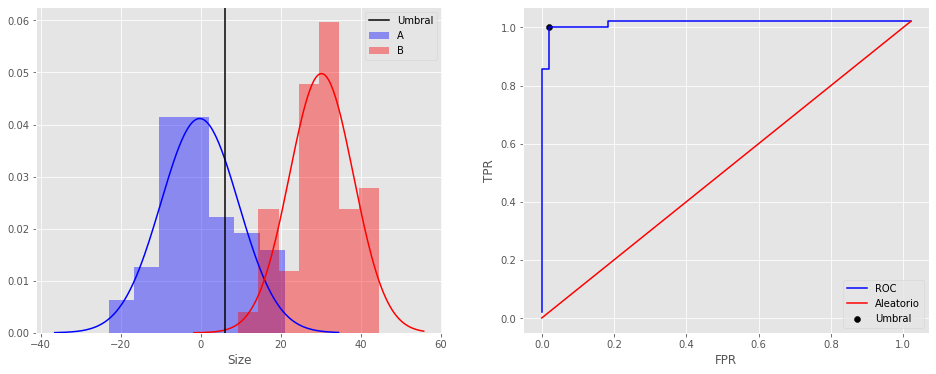

In [ ]:
plt.figure(figsize=(16,6))
ax1=plt.subplot(1, 2, 1)

sns.distplot(df_A['Size'], fit=norm, kde=False, label = 'A', color = 'b', ax = ax1, fit_kws={"color":"blue"});
sns.distplot(df_B['Size'], fit=norm, kde=False, color = 'r', label = 'B', ax = ax1, fit_kws={"color":"red"});
ax1.axvline(umbral, 0, df['Size'].max(), label = 'Umbral', color = '#000000')

ax1.legend()

ax2=plt.subplot(1, 2, 2)

ax2.plot(x,y, color = 'b', label = 'ROC')
ax2.plot(x, x, color = 'r', label = 'Aleatorio')
ax2.scatter(x[umbral_index], y[umbral_index], color = 'black', label = 'Umbral')
ax2.set_xlabel("FPR")
ax2.set_ylabel("TPR")

ax2.legend()


plt.show()

In [ ]:
def Clasificador(dummy_df, limite):
  history = []  
  for i in range(dummy_df.index[-1]+1):
    
    if dummy_df['Size'][i] < limite:
      history.append('A')
    
    else:
      history.append('B')

  return history

In [ ]:
history = Clasificador(df,umbral)

df['predict'] = history

df

,Size,Tag,predict
0,-23.015387,A,A
1,-20.601407,A,A
2,-11.173103,A,A
3,-11.006192,A,A
4,-10.998913,A,A
...,...,...,...
95,41.525776,B,B
96,41.838345,B,B
97,42.586062,B,B
98,43.959442,B,B


Voy a calcular distintos parametros para evaluar el desempeño:

In [ ]:
def Evaluate(dummy_df,true_cond,false_cond):

  #genero una lista con true-false segun corresponda el caso
  FP = [True if real == false_cond and pred == true_cond else False for real, pred in zip(dummy_df["Tag"], dummy_df["predict"])]
  FN = [True if real == true_cond and pred == false_cond else False for real, pred in zip(dummy_df["Tag"], dummy_df["predict"])]

  TP = [True if real == true_cond and pred == true_cond else False for real, pred in zip(dummy_df["Tag"], dummy_df["predict"])]
  TN = [True if real == false_cond and pred == false_cond else False for real, pred in zip(dummy_df["Tag"], dummy_df["predict"])]

  #imprimo los fallos
  print("FN:\n{}".format(dummy_df['Size'][FN]) )
  print('\n')
  print("FP:\n{}".format(dummy_df['Size'][FP]) )

  #evaluo el desempeño
  precision = sum(TP) / (sum(TP) + sum(FP))
  recall = sum(TP) / (sum(TP) + sum(FN))
  f_measure = 2 * (precision*recall)/(precision+recall) 
  accuracy = ( sum(TP) + sum(TN) ) / len(df.index)

  print('\n')
  print('precision = ', precision)
  print('f_measure = ', f_measure)
  print('accuracy = ', accuracy)
  print('\n')
  #creo un nuevo df con los fallos
  FP_df = pd.DataFrame(dummy_df['Size'][FP], columns=['Size'])
  FN_df =  pd.DataFrame(dummy_df['Size'][FN], columns=['Size'])

  FP_df['observacion'] = 'FP'
  FN_df['observacion'] = 'FN'

  return_df = pd.concat([FP_df, FN_df], ignore_index=True)

  return return_df

In [ ]:
Evaluate(df,'A','B')

FN:
37     6.172031
38     7.420442
39     8.654076
40     9.008559
41     9.015907
43    11.337694
44    11.447237
45    14.621079
46    16.243454
47    16.598022
48    16.924546
49    17.448118
58    21.002551
Name: Size, dtype: float64


FP:
Series([], Name: Size, dtype: float64)


precision =  1.0
f_measure =  0.8505747126436781
accuracy =  0.87




,Size,observacion
0,6.172031,FN
1,7.420442,FN
2,8.654076,FN
3,9.008559,FN
4,9.015907,FN
5,11.337694,FN
6,11.447237,FN
7,14.621079,FN
8,16.243454,FN
9,16.598022,FN


In [ ]:
print(df.loc[49,:])
print('\n')
print(df.loc[58,:])
print('\n')
print(df.loc[42,:])

Size       17.4481
Tag              A
predict          B
Name: 49, dtype: object


Size       21.0026
Tag              A
predict          B
Name: 58, dtype: object


Size       9.39871
Tag              B
predict          B
Name: 42, dtype: object


Voy a variar paramatros comenzando por el umbral:

Lo selecciono cerca de la interseccion de ambos ajustes gaussianos (decidido a ojo).

$umbral = 15$

In [ ]:
umbral = 15
history = Clasificador(df,umbral)

df2 = df.assign(predict = history)

df2

,Size,Tag,predict
0,-23.015387,A,A
1,-20.601407,A,A
2,-11.173103,A,A
3,-11.006192,A,A
4,-10.998913,A,A
...,...,...,...
95,41.525776,B,B
96,41.838345,B,B
97,42.586062,B,B
98,43.959442,B,B


In [ ]:
Evaluate(df2,'A','B')

FN:
46    16.243454
47    16.598022
48    16.924546
49    17.448118
58    21.002551
Name: Size, dtype: float64


FP:
42    9.398706
Name: Size, dtype: float64


precision =  0.9782608695652174
f_measure =  0.9375
accuracy =  0.94




,Size,observacion
0,9.398706,FP
1,16.243454,FN
2,16.598022,FN
3,16.924546,FN
4,17.448118,FN
5,21.002551,FN


Observamos que al variar ligeramente el umbral, han disminuido "*accuracy*" y "*f_measure*" pero no se ha visto tan afectada la prescicion. 

Han aumentado los falsos negativos (FN) pero no asi los falsos positivos (FP)

Podemos repetir el calculo para nuevos datasets con mayor o menor solapamiento haciendo uso de las funciones "Clasificador", "CurvaRoc" y "Evaluate"

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

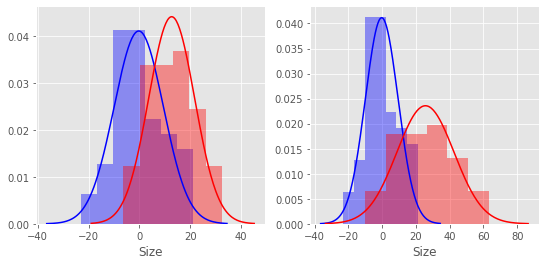

In [ ]:
df3_A = df_A
df4_A = df_A
#Creo el data set B

#CAMBIO EL CENTRO DE LA GAUSSIANA
np.random.seed(1546)
df3_B = pd.DataFrame(np.random.normal(loc = 15, scale=8.0, size=(50, 1)),
                        columns=['Size'])
df3_B['Tag'] = 'B'
df3 = pd.concat([df3_A, df3_B], ignore_index=True)
df3 = df3.sort_values(by = ['Size'], ignore_index=True)


#CAMBIO LA DESVIACION ESTANDAR DE LA GAUSSIANA
np.random.seed(1546)
df4_B = pd.DataFrame(np.random.normal(loc = 30, scale=15.0, size=(50, 1)),
                        columns=['Size'])
df4_B['Tag'] = 'B'
df4 = pd.concat([df4_A, df4_B], ignore_index=True)
df4 = df4.sort_values(by = ['Size'], ignore_index=True)




plt.figure(figsize=(9, 4))

ax1 = plt.subplot(1,2,1)

ax1 = sns.distplot(df3_A['Size'], fit=norm, kde=False, color = 'b', fit_kws={"color":"blue"});
sns.distplot(df3_B['Size'], fit=norm, kde=False, color = 'r', ax = ax1, fit_kws={"color":"red"});

ax2 = plt.subplot(1,2,2)

ax2 = sns.distplot(df4_A['Size'], fit=norm, kde=False, color = 'b', fit_kws={"color":"blue"});
sns.distplot(df4_B['Size'], fit=norm, kde=False, color = 'r', ax = ax2, fit_kws={"color":"red"});

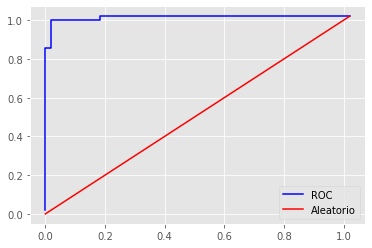



max =  0.6926760305500878
umbral_index =  49
umbral =  6.172031097074192


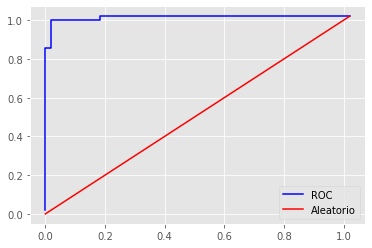



max =  0.6926760305500878
umbral_index =  49
umbral =  6.172031097074192


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

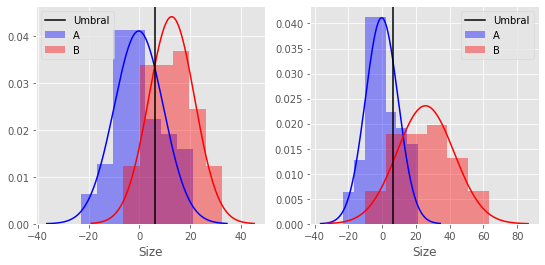

In [ ]:
#Creo la curva roc

x3, y3, umbral3 = CurvaRoc(df3_A,df3_B)

x4, y4, umbral4 = CurvaRoc(df4_A,df4_B)


plt.figure(figsize=(9,4))
ax1=plt.subplot(1, 2, 1)

sns.distplot(df3_A['Size'], fit=norm, kde=False, label = 'A', color = 'b', ax = ax1, fit_kws={"color":"blue"});
sns.distplot(df3_B['Size'], fit=norm, kde=False, color = 'r', label = 'B', ax = ax1, fit_kws={"color":"red"});
ax1.axvline(umbral3, 0, df['Size'].max(), label = 'Umbral', color = '#000000')

ax1.legend()

ax2=plt.subplot(1, 2, 2)

sns.distplot(df4_A['Size'], fit=norm, kde=False, label = 'A', color = 'b', ax = ax2, fit_kws={"color":"blue"});
sns.distplot(df4_B['Size'], fit=norm, kde=False, color = 'r', label = 'B', ax = ax2, fit_kws={"color":"red"});
ax2.axvline(umbral4, 0, df['Size'].max(), label = 'Umbral', color = '#000000')

ax2.legend()

plt.show()

In [ ]:
history = Clasificador(df3,umbral3)
df3 = df3.assign(predict = history)
Evaluate(df3,'A','B')

FN:
51     6.172031
54     7.420442
55     8.654076
56     9.008559
57     9.015907
64    11.337694
65    11.447237
73    14.621079
78    16.243454
80    16.598022
81    16.924546
83    17.448118
91    21.002551
Name: Size, dtype: float64


FP:
16   -6.416926
20   -4.756716
29   -0.603427
30   -0.302599
32    0.221929
36    1.425753
39    2.690029
40    3.119302
42    3.212585
43    3.525525
44    4.368281
45    4.552584
49    6.108771
50    6.118783
Name: Size, dtype: float64


precision =  0.7254901960784313
f_measure =  0.7326732673267328
accuracy =  0.73




,Size,observacion
0,-6.416926,FP
1,-4.756716,FP
2,-0.603427,FP
3,-0.302599,FP
4,0.221929,FP
...,...,...
22,16.243454,FN
23,16.598022,FN
24,16.924546,FN
25,17.448118,FN


In [ ]:
history = Clasificador(df4,umbral4)
df4 = df4.assign(predict = history)
Evaluate(df4,'A','B')

FN:
43     6.172031
45     7.420442
49     8.654076
50     9.008559
51     9.015907
54    11.337694
55    11.447237
59    14.621079
61    16.243454
62    16.598022
63    16.924546
64    17.448118
69    21.002551
Name: Size, dtype: float64


FP:
6    -10.156736
13    -7.043843
32     0.743575
34     1.307627
36     2.291117
39     4.548288
Name: Size, dtype: float64


precision =  0.8604651162790697
f_measure =  0.7956989247311828
accuracy =  0.81




,Size,observacion
0,-10.156736,FP
1,-7.043843,FP
2,0.743575,FP
3,1.307627,FP
4,2.291117,FP
...,...,...
14,16.243454,FN
15,16.598022,FN
16,16.924546,FN
17,17.448118,FN


Pude identificar que el solapamiento en la segunda distribucion causo un peor desempeño en el clasificador estadistico

Se podria implementar de forma no supervisada, si se unificaran las funciones utilizadas anteriormente. De forma tal que dado un dataframe, encuentre el valor umbral segun la curva roc, clasifique los datos y evalue la calidad del modelo.

Otra implementacion podría ser utilizando redes neuronales.